# Data Preprocessing

In [1]:
import pandas as pd
from io import StringIO

In [2]:
#a simple example data frame frm a CSV file to practise 
#dealing with missing data
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [4]:
df = pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
#using isnullss() method to return a dataframe with Boolean values
#that indicate whether a cell contains missing data(true) or numeric data(false)
#the sum() method returns de number of missing values per column
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# Eliminating samples or features with missing values 
## dropna()

In [14]:
#Eliminating samples or features with missing values
#via the dropna method: axis 0 fr rows, 1 fr columns
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [15]:
#dropna method supports additional parameters:
#only drop rows where all columns are NaN
#returns all rows here since der's no row with all values NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [20]:
#drop rows that have less than a number(4 here) of real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [23]:
#only drop rows where NaN appear in specific columns(here:'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [24]:
#columns C and D here
df.dropna(subset=['C','D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


# Imputing missing values

# mean imputation

In [25]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer 
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data
#setting axis=1 calculates row means
#other strategies are 'median'  or 'mode'

c:\users\ek\gis\venv\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Handling Categorical Data

In [68]:
#Creating an example dataset containing a nominal feature: color,
#ordinal feature: size, and numerical feature: price
df2 = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df2.columns = ['color', 'size', 'price', 'classlabel']
df2

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [69]:
#using LabelEncoder to convert ordinal feature values to numerical vlaues
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['size'] = le.fit_transform(df2['size'])
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,0,13.5,class2
2,blue,2,15.3,class1


In [70]:
#using LabelEncoder to convert class labels to numerical vlaues
df2['classlabel'] = le.fit_transform(df2['classlabel'])
df2
#can use the inverse_transform method to transform the integer 
#class labels back into their original string representations

,color,size,price,classlabel
0,green,1,10.1,0
1,red,0,13.5,1
2,blue,2,15.3,0


# Performing one-hot encoding on nominal features(color here)

In [72]:
X = df2[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 0, 13.5],
       [0, 2, 15.3]], dtype=object)

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

c:\users\ek\gis\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

In [74]:
#an even more convenient way is to create those dummy features via one-hot encoding is to use the
#get_dummies method implemented in pandas
#which when applied to a dataframe, converts string columns and leave all other columns unchanged
pd.get_dummies(df2[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,0,0,0,1
2,15.3,2,1,0,0


In [75]:
#use drop-first parameter = true to reduce correlation among variables
pd.get_dummies(df2[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,0,0,1
2,15.3,2,0,0


# Partitioning a dataset into separate training and test sets

In [7]:
#using diabetes dataset in the dataset directory
import pandas as pd
df_wbc = pd.read_csv('datasets/wisc_bc_data.csv')
df_wbc = df_wbc.drop('id', axis=1)
df_wbc.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_wbc['diagnosis'] = le.fit_transform(df_wbc['diagnosis'])
#Benign = 0, Malignant = 1

In [9]:
df_wbc.describe()
df_wbc.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
import numpy as np
print('class labels', np.unique(df_wbc['diagnosis']))

class labels [0 1]


In [11]:
df_wbc.iloc[:5, 30]

0    0.11890
1    0.08902
2    0.08758
3    0.17300
4    0.07678
Name: fractal_dimension_worst, dtype: float64

In [12]:
#separating dataset into test and training datasets using
#the train_test_split() from sklearn's model_selection submodule:
from sklearn.model_selection import train_test_split
X, y = df_wbc.iloc[:, 1:30].values, df_wbc.iloc[:, 0].values

In [13]:
#stratify ensures that both training and test datasets have the same
#class proportions as the original dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Feature Scaling

In [14]:
#Normalization with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Note: 
Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, standardization can be more practical for many machine learning algorithms, especially for optimization algorithms
such as gradient descent.
The reason is that many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0. 
Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights. 
Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [95]:
#Illustration
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [15]:
#Standardization with StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Selecting meaningful features

In [8]:
#For regularized models in scikit-learn that support L1 regularization,
#simply set the penalty parameter to 'L1' to obtain a sparse solution:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9949748743718593
Test accuracy: 0.9473684210526315


c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Dimensionality Reduction

# Principal Component Analysis in Scikit-Learn

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
%matplotlib inline

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [49]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
sc_df = sc.transform(df)
sc_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sc_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_pca = pca.transform(sc_df)

In [16]:
sc_df.shape

(569, 30)

In [17]:
x_pca.shape

(569, 2)

In [62]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

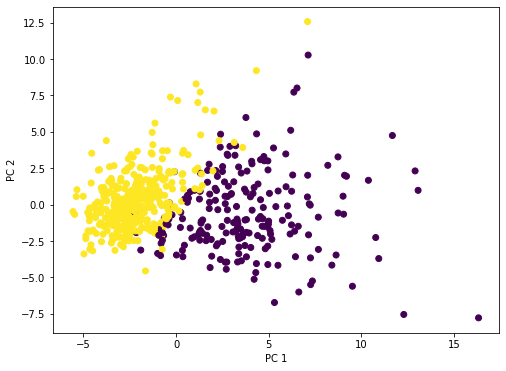

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the 2 new independent features based on the target value 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [18]:
#plot_decision_region function to visualize the decision regions
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.6,
                   c=cmap(idx),
                   edgecolor='black',
                   marker=markers[idx],
                   label=cl)
    

c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


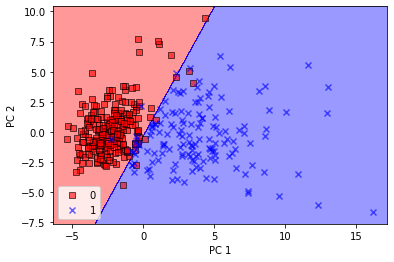

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


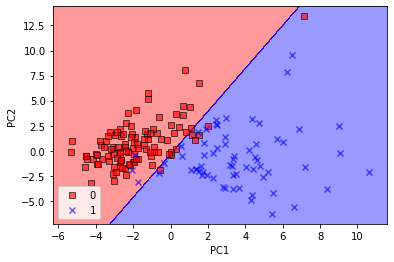

In [38]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

# Supervised data compression via Linear Discriminant Analysis (LDA)

In [40]:
#LDA vi scikit-learn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

c:\users\ek\gis\venv\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


IndexError: index 1 is out of bounds for axis 1 with size 1

# Kernel Principal Component Analysis in scikit-learn

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

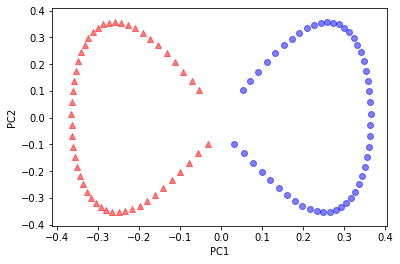

In [44]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                       kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0],
           X_skernpca[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Learning Best Practices for Model Evaluation and Hyperparameter Tuning 

Combining Transformers and Estimators in a Pipeline
Instead of going through the fitting and transformation steps for the training and test datasets separately, we can chain the StandardScaler, PCA, and LogisticRegression objects in a pipeline:

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=2), 
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.936


c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using k-fold cross-validation to assess model performance:
    - The hold out method
    - K-fold cross-validation

In [20]:
#Stratified k-fold cross validation
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))


Fold:  1, Class dist.: [225 133], Acc: 0.925
Fold:  2, Class dist.: [225 133], Acc: 0.925
Fold:  3, Class dist.: [225 133], Acc: 0.950
Fold:  4, Class dist.: [225 133], Acc: 1.000
Fold:  5, Class dist.: [225 133], Acc: 1.000
Fold:  6, Class dist.: [225 133], Acc: 0.950
Fold:  7, Class dist.: [225 133], Acc: 0.975
Fold:  8, Class dist.: [225 133], Acc: 0.900
Fold:  9, Class dist.: [225 134], Acc: 1.000
Fold: 10, Class dist.: [225 134], Acc: 0.974


c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                        cv=10,
                        n_jobs=1)
print('CV accuracy scores: %s' % scores)

c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

CV accuracy scores: [0.925      0.925      0.95       1.         1.         0.95
 0.975      0.9        1.         0.97435897]


In [22]:
print('CV accuracy: %.3f +/- %3.f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.960 +/-   0


# Fine-tuning machine learning models via grid searching

Tuning hyperparameters via grid search:
- A brute-force exhaustive search paradigm where a list of values for different hyperparameters are specified and the computer evaluates the model performance fr each combination of those to obtain the optimal combination of values frm this set:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
              'svc__kernel': ['linear']},
             {'svc__C': param_range,
             'svc__gamma': param_range,
             'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = 1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_, "\n", gs.best_params_)


0.9849246231155779 
 {'svc__C': 1.0, 'svc__kernel': 'linear'}


c:\users\ek\gis\venv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In the preceding code, a GridSearchCV object was initialized to train and tune a SVM pipeline.
We set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune.
- For the linear SVM, we only evaluated the inverse regularization parameter C; for the RBF kernel SVM, we tuned both the svc__C and svc__gamma parameter
- Note that the svc__gamma parameter is for kernel SVMs.

After we used the training data to perform the grid search, we obtained the score of the best-performing model via the best_score_ attribute.
We also looked at its parameters that can be accessed via the best_params_ attribute.
In this case, the linear SVM model with svc__C = 1.0 yielded the best k-fold cross-validation accuracy: 98.5%

Finally using the independent test dataset to estimate 
the performance of the  best-selected model, which is 
available via the best_estimator_ attribute of 
the GridSearchCV object.

In [29]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.942


# Algorithm selection with nested cross-validation

In [30]:
#can perform nested cross-validation in 
#scikit-learn as follows:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=2)
scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV accuracy: 0.977 +/- 0.017


In [35]:
#using the nested cross-validation approach to compare
#an SVM model to a simple decision tree classifier, only
#tuning its depth parameter:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid=[{'max-depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring='accuracy', cv=2)


In [36]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

c:\users\ek\gis\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Invalid parameter max-depth for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

# Looking at different evaluation metrics

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[103   4]
 [  3  61]]


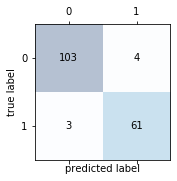

In [41]:
#mapping this information using matshow function:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', 
           ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Optimizing the precision and recall of a classification model

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

Precision: 0.938


In [43]:
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.953


In [44]:
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

F1: 0.946


In [45]:
#Can use a scoring metric than accuracy in the GridSearchCV
#via the scoring parameter
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid, 
                  scoring=scorer, cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_, "\n", gs.best_params_)

0.9881439858510084 
 {'svc__C': 1.0, 'svc__kernel': 'linear'}


c:\users\ek\gis\venv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Dealing with class imbalance

Create imbalanced dataset from the breast cancer dataset which originally consisted of 357 benign tumors(class 0) and stack them with the first 40 malignant samples(class 1) to create a stark class imbalance.

In [46]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [47]:
#compute accuracy of the model that always predicts the majority
#class(benign, class 0)
#should achieve an accuracy of approximately 90%:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

Thus, when we fit classifiers on such datasets, it would
make sense to focus on other metrics than accuracy when 
comparing different models, such as precision, recall,
the ROC curve.

- One way to deal with imbalanced class proportions 
during model ftting is to assign a larger penalty to 
wrong predictions on the minority class. Via 
scikit-learn, adjusting such a penalty is as 
convenient as setting the class_weight parameter to
class_weight='balanced', which is implemented for 
most classifers.
- Other popular strategies for dealing with class 
imbalances include upsampling the minority class, downsampling the majority class,
and the generation of synthetic samples.

The scikit-learn implements a simple resample function 
that can help with
the upsampling of the minority class by drawing new samples from the dataset with
replacement. 
The following code will take the minority class from our imbalanced
breast cancer dataset (here, class 1) and repeatedly draw new samples from it until it
contains the same number of samples as class label 0:

In [49]:
from sklearn.utils import resample

print('Number of class 1 samples before:', 
      X_imb[y_imb == 1].shape[0])

Number of class 1 samples before: 40


In [50]:
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                   y_imb[y_imb == 1],
                                   replace=True,
                                   n_samples=X_imb[y_imb == 0].shape[0],
                                   random_state=123)
print('Number of class 1 samples after upsampling:',
     X_upsampled.shape[0])

Number of class 1 samples after upsampling: 357


In [51]:
#stacking the original class 0 samples with the upsampled
#class 1 subset to obtain a balanced dataset as follows:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [52]:
#Consequently, a majority vote prediction rule would
#only achieve 50% accuracy:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

# Applying bagging to classiy samples in the Breast Cancer dataser

In [1]:
#using diabetes dataset in the dataset directory
import pandas as pd
df_wbc = pd.read_csv('datasets/wisc_bc_data.csv')
df_wbc = df_wbc.drop('id', axis=1)
#df_wbc.head(5)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_wbc['diagnosis'] = le.fit_transform(df_wbc['diagnosis'])
#Benign = 0, Malignant = 1

#separating dataset into test and training datasets using
#the train_test_split() from sklearn's model_selection submodule:
from sklearn.model_selection import train_test_split
X, y = df_wbc.iloc[:, 1:30].values, df_wbc.iloc[:, 0].values

#stratify ensures that both training and test datasets have the same
#class proportions as the original dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#Standardization with StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Implementing Classifiers via majority vote, the evaluate 
the model performance of each classifier via 10-fold cross
validation on the training dataset before we combine them into an ensemble classifier:

In [3]:
clf1 = LogisticRegression(penalty='l2',
                         C=0.001,
                         random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1,
                             criterion='entropy',
                             random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1,
                           p=2,
                           metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
#pipe2 = Pipeline([['sc', StandardScaler()], ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision Tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv=10,
                            scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" %(scores.mean(),
                                             scores.std(), label))
    

10-fold cross validation:



c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ROC AUC: 0.99 (+/- 0.02) [Logistic regression]
ROC AUC: 0.91 (+/- 0.07) [Decision Tree]
ROC AUC: 0.96 (+/- 0.04) [KNN]


Implementing a MajorityVoteClassifier:

In [19]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator,
ClassifierMixin):
    
    """ A majority vote ensemble classifier
        Parameters
        ----------
    classifiers : array-like, shape = [n_classifiers]
    Different classifiers for the ensemble
    vote : str, {'classlabel', 'probability'}
    Default: 'classlabel'
    If 'classlabel' the prediction is based on
    the argmax of class labels. Else if
    'probability', the argmax of the sum of
    probabilities is used to predict the class label
    (recommended for calibrated classifiers).
    weights : array-like, shape = [n_classifiers]
    Optional, default: None
    If a list of `int` or `float` values are
    provided, the classifiers are weighted by
    importance; Uses uniform weights if `weights=None`.
    """
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Matrix of training samples.
        y : array-like, shape = [n_samples]
            Vector of target class labels.
        Returns
        -------
        self : object
        """
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                                        self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):
        """Predict class labels for X.
        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_samples, n_features]
            Matrix of training samples.
        Returns
        ----------
        
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X),
                                axis=1)
        else: #'classlabel' vote
            #Collect results frm clf.predict calls
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)),
                                          axis=1,
                                          arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        """ Predit class probabilities for X.
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Training vectors, where n_samples is
            the number of samples and
            n_features is the number of features.
        Returns
        ----------
        avg_proba : array-like,
            shape = [n_samples, n_classes]
            Weighted average probability for
            each class per sample.
        """
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out
        
        

c:\users\ek\gis\venv\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
#Combining the individual classifiers for majority rule 
#voting in the MajorityVoteClassifier:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv=10,
                            scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Evaluating and Tuning the Ensemble Classifier

c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ek\gis\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


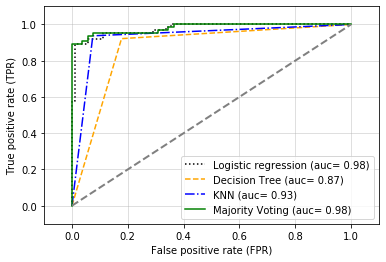

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    #assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls,
            label='%s (auc= %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--',color='gray',
        linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

# Bagging -  building an ensemble of classifiers from bootstrap samples

Instead of using the same training set to ft the 
individual classifers in the ensemble, we draw 
bootstrap samples (random samples with replacement) 
from the initial training set.
Each classifer receives a random subset of samples from the training set. Each subset contains a certain portion of duplicates and some of the original samples don't appear in a resampled dataset at all due to
sampling with replacement. Once the individual classifers are ft to the bootstrap samples, the predictions are combined using majority voting.

Applying baffing to classify samples in the breast cancer dataset

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(criterion='entropy',
                             random_state=1,
                             max_depth=None)
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=500,
                       max_features=1.0,
                       bootstrap=True,
                       max_samples=1.0,
                       bootstrap_features=False,
                       n_jobs=1,
                       random_state=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.942


Based on the accuracy values that we printed here, 
the unpruned decision tree predicts all the class labels 
of the training samples correctly; however, the 
substantially lower test accuracy indicates high variance 
(overftting) of the model:

In [5]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.942


# Leveraging weak learners via adaptive boosting (AdaBoost)

AdaBoost uses the complete training set to train the weak 
learners where the training samples are reweighted in 
each iteration to build a strong classifer that learns 
from the mistakes of the previous weak learners in the 
ensemble.

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',
                             random_state=1,
                             max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=500,
                        learning_rate=0.1,
                        random_state=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.935/0.860


The decision tree stump seems to underfit the training data
in contrast to the unpruned decision tree that we saw in
the previous section: 

In [5]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.965


# Applying ML to Sentiment Analysis

In [ ]:
#using the movie review dataset
import pandas as pd
import os


In [3]:
basepath = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
df.columns = ['review', 'sentiment']
print('done')

done


In [4]:
import numpy as np
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

In [7]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(3)

NameError: name 'pd' is not defined

Introducing the bag-of-words model, which allows us to represent text as numerical feature vectors:
 - We create a vocabulary of unique tokens-for example, word-from the entire set of documents
 - we construct a feature vector from each document that contains the counts of how often each word occurs in the particular document

In [14]:
#transforming words into feature vectors
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
    'The sun is shining',
    'The weather is sweet',
    'The sun is shining, the weather is sweet, and one and one is two'
])
bag = count.fit_transform(docs)
#bag

In [15]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [16]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


Assessing word relevancy via term
frequency-inverse document frequency.
These frequently occurring words typically
don't contain useful or discriminatory information. In this subsection, we will learn
about a useful technique called term frequency-inverse document frequency
(tf-idf) that can be used to downweight these frequently occurring words in the
feature vectors.

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


Cleaning text data

In [18]:
df.loc[0, 'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

 While HTML markup does not contain much useful
semantics, punctuation marks can represent useful, additional information in certain
NLP contexts. However, for simplicity, we will now remove all punctuation marks
except for emoticon characters such as :) since those are certainly useful for sentiment
analysis. To accomplish this task, we will use Python's regular expression (regex)
library, re, as shown here:

In [10]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    return text 

In [11]:
preprocessor(df.loc[0, 'review'][-50:])

'is seven title brazil not available'

In [21]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [22]:
#applying the preprocessor function to all the movie reviews
#in the DataFrame:
df['review'] = df['review'].apply(preprocessor)

Processing documents into tokens

In [18]:
def tokenizer(text):
    return text.split()
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In the context of tokenization, another useful technique is word stemming, which
is the process of transforming a word into its root form. It allows us to map related
words to the same stem. The original stemming algorithm was developed by Martin
F. Porter in 1979 and is hence known as the Porter stemmer algorithm

In [16]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

While stemming can create non-real words, such as 'thu' (from
'thus'), as shown in the previous example, a technique called
lemmatization aims to obtain the canonical (grammatically correct) forms
of individual words—the so-called lemmas. However, lemmatization
is computationally more diffcult and expensive compared to stemming
and, in practice, it has been observed that stemming and lemmatization
have little impact on the performance of text classifcation

In [6]:
#Stop words removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:] if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

Training a Logistic Model for document classification

In [8]:
import pandas as pd
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [12]:
#applying the preprocessor function to all the movie reviews
#in the DataFrame, to remove html tags:
df['review'] = df['review'].apply(preprocessor)

In [13]:
#Splitting cleaned df into train and test sets
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [14]:
#using a GridSearchCV obj to find the optimal set of params
#for out logistic regression model using 5-fold stratified
#cross-validation:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None)
lr_tfidf = Pipeline([('vect', tfidf),
                    ('clf', LogisticRegression(random_state=0,
                                              C=10.0,
                                              stop_words=None,
                                              penalty='l2'))])
lr_tfidf.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'stop_words'